In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df_snp = pd.DataFrame(pd.read_csv('g2f_hybrids_synthetic.csv', sep='\t', index_col=0).T)
df_snp.head()

taxa,chr1_2111,chr1_6984,chr1_7035,chr1_7080,chr1_9405,chr1_10097,chr1_109083,chr1_109116,chr1_109133,chr1_109136,...,chr10_149808541,chr10_149811649,chr10_149811754,chr10_149835306,chr10_149921669,chr10_149921672,chr10_149928095,chr10_149928138,chr10_149928160,chr10_150087943
X2369.3IIH6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X2369.PHN82,0.5,0.5,0.5,0.5,0.5,0.0,0.5,0.5,0.5,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B14A.MO17,0.5,0.5,0.5,0.5,0.5,0.0,0.5,0.5,0.5,0.5,...,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0
B37.H95,0.0,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B73.MO17,0.5,0.5,0.5,1.5,0.5,0.0,0.5,0.5,0.5,0.5,...,1.0,0.0,0.5,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
df_snp.to_csv (r'snp_irrigation.csv', index = True, header=True)

In [ ]:
## Start from here

In [2]:
df_irr = pd.read_csv("gxePlantHeight.csv")
df_irr.head()

,PID,DAP,Genotype,Female,Male,DaysOfYear,Date,State,Country,Height-Diff,GrowthRate-Diff,Precipitation,Humidity,SolarRadiation,Temperature,GDD,CGDD,col
0,1,1,2369 x 3IIH6,2369,3IIH6,145,5/25/17,NE,USA,-0.021148,-0.027311,3.10,64.91,29.65,60.458,13.122,13.122,lightsalmon1
1,2,2,2369 x 3IIH6,2369,3IIH6,146,5/26/17,NE,USA,-0.021419,-0.026821,3.22,59.76,28.76,60.080,12.141,25.263,lightsalmon1
2,3,3,2369 x 3IIH6,2369,3IIH6,147,5/27/17,NE,USA,-0.021684,-0.026233,3.75,64.47,28.98,57.344,8.208,33.471,lightsalmon1
3,4,4,2369 x 3IIH6,2369,3IIH6,148,5/28/17,NE,USA,-0.021943,-0.025540,0.39,46.44,27.61,61.772,12.537,46.008,lightsalmon1
4,5,5,2369 x 3IIH6,2369,3IIH6,149,5/29/17,NE,USA,-0.022194,-0.024734,0.03,42.16,26.71,64.004,13.995,60.003,lightsalmon1


In [3]:
df_snp = pd.read_csv('snp_irrigation.csv')
df_snp.head()

,Genotype,chr1_2111,chr1_6984,chr1_7035,chr1_7080,chr1_9405,chr1_10097,chr1_109083,chr1_109116,chr1_109133,...,chr10_149808541,chr10_149811649,chr10_149811754,chr10_149835306,chr10_149921669,chr10_149921672,chr10_149928095,chr10_149928138,chr10_149928160,chr10_150087943
0,2369.3IIH6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2369.PHN82,0.5,0.5,0.5,0.5,0.5,0.0,0.5,0.5,0.5,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,B14A.MO17,0.5,0.5,0.5,0.5,0.5,0.0,0.5,0.5,0.5,...,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,B37.H95,0.0,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,B73.MO17,0.5,0.5,0.5,1.5,0.5,0.0,0.5,0.5,0.5,...,1.0,0.0,0.5,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [4]:
df_irr['Female'] = [x.replace('-','_').replace(' ','') for x in df_irr.Female]
df_irr['Male'] = [x.replace('-','_').replace(' ','') for x in df_irr.Male]
df_snp['Female']=[x.split(".")[0] for x in df_snp.Genotype]
df_snp['Male']=[x.split(".")[1] for x in df_snp.Genotype]
df_snp.drop('Genotype', axis=1, inplace=True)
df_snp.head()

,chr1_2111,chr1_6984,chr1_7035,chr1_7080,chr1_9405,chr1_10097,chr1_109083,chr1_109116,chr1_109133,chr1_109136,...,chr10_149811754,chr10_149835306,chr10_149921669,chr10_149921672,chr10_149928095,chr10_149928138,chr10_149928160,chr10_150087943,Female,Male
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2369,3IIH6
1,0.5,0.5,0.5,0.5,0.5,0.0,0.5,0.5,0.5,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2369,PHN82
2,0.5,0.5,0.5,0.5,0.5,0.0,0.5,0.5,0.5,0.5,...,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,B14A,MO17
3,0.0,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B37,H95
4,0.5,0.5,0.5,1.5,0.5,0.0,0.5,0.5,0.5,0.5,...,0.5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,B73,MO17


In [5]:
df = pd.merge(left=df_irr, right=df_snp, left_on=['Female','Male'], right_on=['Female','Male'])
df.head()

,PID,DAP,Genotype,Female,Male,DaysOfYear,Date,State,Country,Height-Diff,...,chr10_149808541,chr10_149811649,chr10_149811754,chr10_149835306,chr10_149921669,chr10_149921672,chr10_149928095,chr10_149928138,chr10_149928160,chr10_150087943
0,1,1,2369 x 3IIH6,2369,3IIH6,145,5/25/17,NE,USA,-0.021148,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2,2369 x 3IIH6,2369,3IIH6,146,5/26/17,NE,USA,-0.021419,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3,2369 x 3IIH6,2369,3IIH6,147,5/27/17,NE,USA,-0.021684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,4,2369 x 3IIH6,2369,3IIH6,148,5/28/17,NE,USA,-0.021943,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,5,2369 x 3IIH6,2369,3IIH6,149,5/29/17,NE,USA,-0.022194,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
print(df_snp.Male.unique())
print(df_irr.Male.unique())

['3IIH6' 'H95' 'LH123HT' 'LH185' 'LH38' 'LH51' 'LH82' 'MO17' 'PHB47'
 'PHG29' 'PHG47' 'PHG83' 'PHK56' 'PHM49' 'PHN37' 'PHN82' 'PHR55' 'PHW30'
 'PHZ51' 'Q381']
['3IIH6' 'PHN82' 'H95' 'MO17' 'PHM49' 'PHZ51' 'LH123HT' 'LH185' 'LH38'
 'LH51' 'PHG29' 'PHG47' 'PHG83' 'PHK56' 'PHR55' 'PHW30' 'Q381' 'LH82'
 'PHN37' 'PHB47']


In [33]:
df.to_csv(r'Irrigation_GR_SNPs.csv', header=True)

In [32]:
print(df_irr.shape)
print(df.shape)

(5600, 18)
(4970, 168404)


[15.9 26.  34.6 42.1 48.3 54.  59.3 63.6 67.5 71.1 74.6 77.9 80.8 83.6
 85.7 87.6 89.4 90.9 92.3 93.5 94.6 95.6 96.6 97.3 98.  98.6 99.1 99.4
 99.6 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7
 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7
 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7
 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7
 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7 99.7
 99.7]


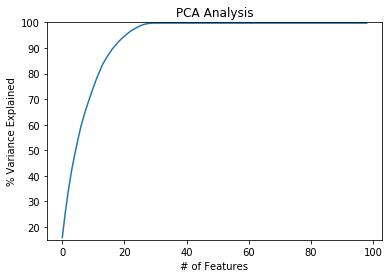

In [51]:
df_std = StandardScaler().fit_transform(df)
pca = PCA(n_components = 99) # 0<=99<=min(#sample,#features)
pca.fit(df_std)

# Variance
variance = pca.explained_variance_ratio_

#cumulative sum of variance explained with [n] features
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print(var)

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(15,100)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

[15.9 26.  34.6 42.1 48.3 54.  59.3 63.6 67.5 71.1 74.6 77.9 80.8 83.6
 85.7 87.6 89.4 90.9 92.3 93.5 94.6 95.6 96.6 97.3 98. ]


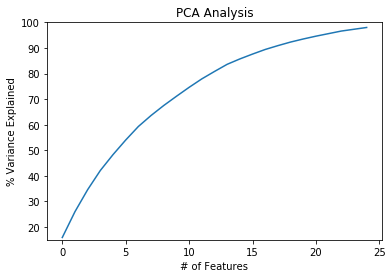

In [52]:
n=25
pca = PCA(n_components = n) # 0<=99<=min(#sample,#features)
pca.fit(df_std)
variance = pca.explained_variance_ratio_

#cumulative sum of variance explained with [n] features
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
print(var)

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(15,100)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [54]:
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]
print(xvector)
print(yvector)
xs = pca.transform(df_std)[:,0]
ys = pca.transform(df_std)[:,1]
print(xs)
print(ys)

[0.00360662 0.00222732 0.00317483 ... 0.00180761 0.00340271 0.00340271]
[-0.00068845 -0.00061969 -0.00212602 ...  0.0014661  -0.0030836
 -0.0030836 ]
[   9.15365819  -40.12833881  428.6867449   -31.15819122  749.18247822
  454.58720147  373.91352849  723.16837034   91.12085908  -76.27579766
  -28.13225634  -96.0646899   -51.45303354  -79.40938653 -113.00796727
 -114.61699784 -111.24660405  -11.30268939 -107.70670453 -124.15220513
 -123.9588627   241.54813731 -100.65270591  -28.61223074   19.53131058
  -48.40112298   -3.78946662  -31.74581961  -65.34440035  -66.95343092
  -63.58303713   36.36087753  -60.04313761  -76.4886382   -76.29529577
  289.21170423  -52.98913899  -13.39102601   34.75251531  -33.17991825
   11.43173811  -16.52461488  -50.12319562  -51.73222619  -48.3618324
   51.58208226  -11.40278015  -44.82193288  -61.26743348  -61.07409105
  -37.76793426  -21.64848366  263.87112318  -52.35344547   -4.20990415
  -72.14233772  -27.53068136  -55.48703434  -89.08561508  -90.69464565

KeyboardInterrupt: 

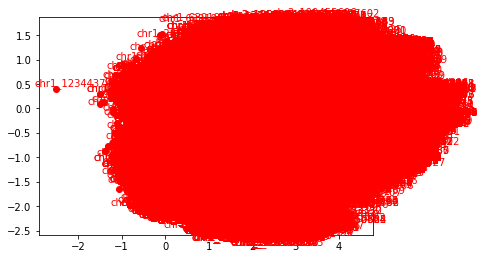

In [56]:
for i in range(len(xvector)):
    plt.scatter(xvector[i]*max(xs), yvector[i]*max(ys),
              color='r')
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(df.columns.values)[i], color='r')
plt.show()

In [43]:
for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(df.columns.values)[i], color='r')

#for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
#    plt.plot(xs[i], ys[i], 'bo')
#    plt.text(xs[i]*1.2, ys[i]*1.2, list(df.index)[i], color='b')

plt.show()

KeyboardInterrupt: 

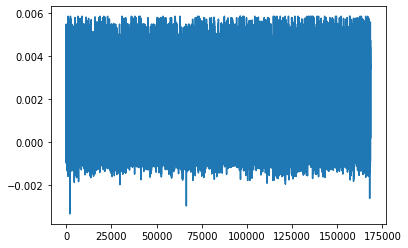

In [48]:
plt.plot(pca.components_[0])

In [1]:
df.head()

NameError: name 'df' is not defined